## Object-Oriented vs Pyplot

- Object-oriented: instance of `axes.Axes` to render visualizations on an instance of `figure.Figure` 
- MATLAB: state-based interface through the `pyplot` interface

Some definition:

- **Figure:** finale image. It may contain one or more **Axes**.
- **Axes:** represent an individual plot.

Methods do the plotting are called directly from the Axes.

## Data

In [1]:
# sphinx_gallery_thumbnail_number = 10
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

## Plot

We will start by generating an instance of `figure` and `axes`

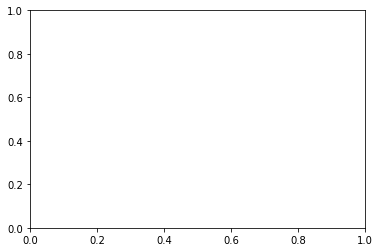

In [8]:
fig, ax = plt.subplots()

By having the `Axes` instance we can plot on top of it:

<BarContainer object of 10 artists>

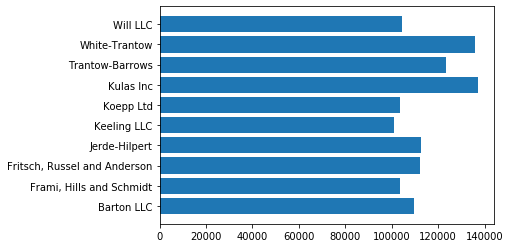

In [9]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

## Style

In order to see a list of the available styles we can use `style`:


In [12]:
print(plt.style.available)

['seaborn-pastel', 'Solarize_Light2', 'fivethirtyeight', 'tableau-colorblind10', 'seaborn-muted', 'seaborn-dark', 'seaborn-white', 'fast', 'seaborn-poster', 'classic', 'grayscale', 'seaborn-talk', '_classic_test', 'seaborn-colorblind', 'seaborn-ticks', 'seaborn-deep', 'seaborn-bright', 'seaborn-dark-palette', 'seaborn', 'seaborn-darkgrid', 'ggplot', 'seaborn-notebook', 'bmh', 'dark_background', 'seaborn-whitegrid', 'seaborn-paper']


In [13]:
plt.style.use('fivethirtyeight')

<BarContainer object of 10 artists>

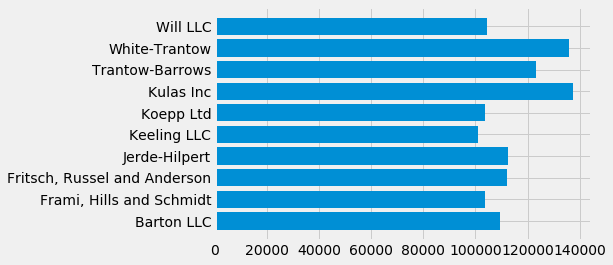

In [14]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

## Custom plot

We want to rotate the labels on the x-axisis with the function `pyplot.setp()`:

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

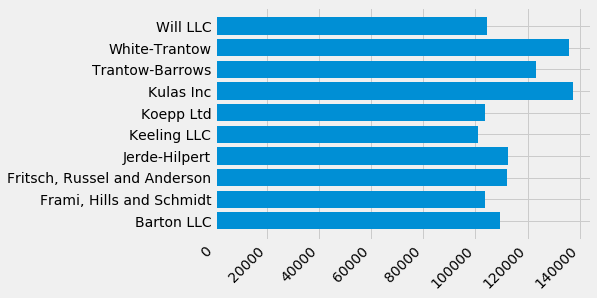

In [16]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

In order to allocate automatically enough space for any object that we create in our plot:

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

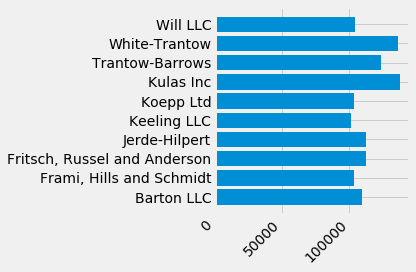

In [17]:
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

We add labels:

[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

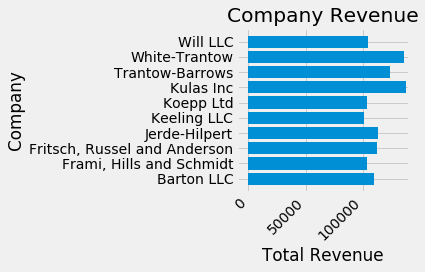

In [19]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

We can then adjust the size of the plot using `pyplot.subplots()`:

[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

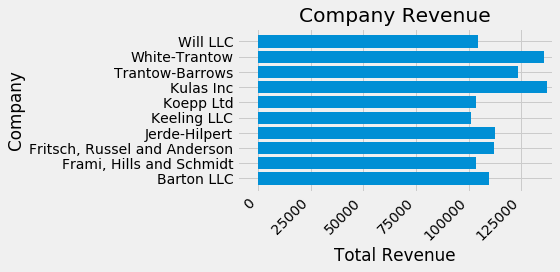

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')

Then we want custom units on our x-label. We start by defining a function to format the string:

In [21]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

formatter = FuncFormatter(currency)

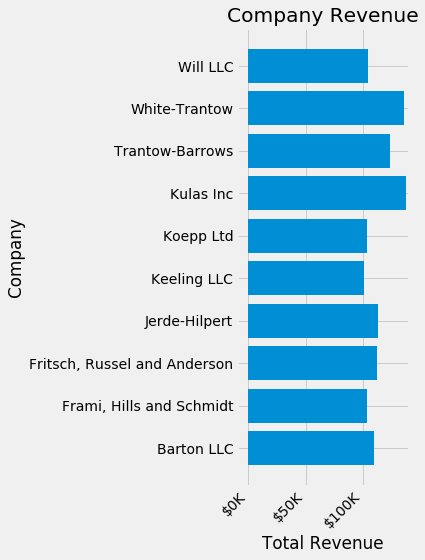

In [22]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)

## Multriple visualizations

We can draw multiple plot elements on the same `Axes` instance, simply by calling another plot method on the same axes object.

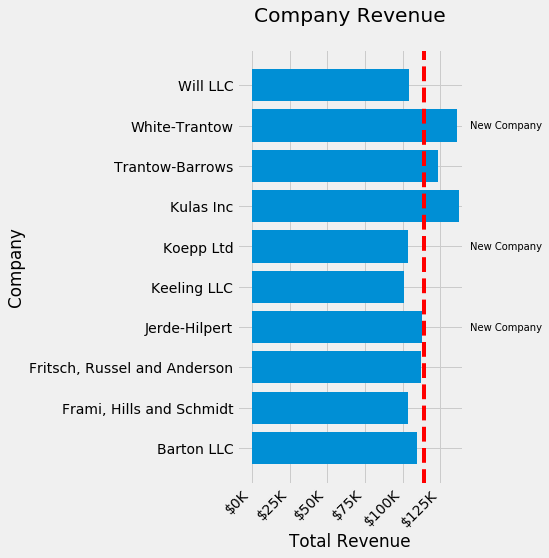

In [23]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
            verticalalignment="center")

# Now we'll move our title up since it's getting a little cramped
ax.title.set(y=1.05)

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
       title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()